<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.975 · Deep Learning · PAC2</p>
<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 2: Xarxes neuronals recurrents amb Keras

<u>Consideracions generals</u>:

- Aquesta PAC s'ha de realitzar de forma **estrictament individual**. Qualsevol indicatiu de còpia serà penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluació negativa de l'assignatura de manera íntegra.
- És necessari que l'estudiant indiqui **totes les fonts** que ha utilitzat per a la realització de la PAC. De no ser així, es considerarà que l'estudiant ha comès plagi, sent penalitzat amb un suspens (D) i la possible avaluació negativa de l'assignatura de manera íntegra.

<u>Format de l'entrega</u>:

- Alguns exercicis poden suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en **format notebook** i en **format html**, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a HTML des del menú File $\to$ Download as $\to$ HTML.
- Existeix un tipus de cel·la especial per allotjar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de l'activitat. Per canviar el tipus de cel·la a aquest tipus, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

# 0. Context i càrrega de llibreries

# Xarxes Neuronals Recurrents

Les **xarxes neuronals recurrents (RNNs)** es basen justament en aquesta idea: són xarxes dissenyades per processar seqüències, mantenint un estat ocult que evoluciona amb el temps i resumeix la informació rellevant del passat. Així, les RNN permeten capturar patrons temporals i contextuals molt més llargs que els models clàssics de $n$-grames, sent una eina fonamental per a tasques com a generació de text, anàlisi de sentiments, traducció automàtica, entre d'altres.

**En aquesta pràctica, a la primera part explorarem com funcionen les RNNs des de zero, implementant i entrenant una xarxa bàsica per a tasques de modelatge de llenguatge. A la segona, farem servir models ja implementats per aplicar-lo a un problema real d'estimació del consum d'energia.**


In [1]:
# LLIBRERIES NECESSÀRIES
import tensorflow as tf
import numpy as np

2025-04-20 08:38:56.668787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745138336.919876      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745138336.987273      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# !pip install "tensorflow<2.11"

# 1. Implementar una RNN des de Zero (Pas a Pas)

**1.1. Implementació RNN (Forward Pass) des de Zero**

**Què és una RNN?**
Una Xarxa Neuronal Recurrent (RNN) és una arquitectura dissenyada per processar dades seqüencials (com text o sèries de temps). La seva característica clau és l'**estat ocult** (`h_t`), que actua com a memòria dinàmica emmagatzemant informació contextual de tots els passos anteriors. A diferència dels models de n-grames, les RNNs poden capturar dependències a *llarg termini* mitjançant aquesta memòria recurrent, processant seqüències de longitud variable de manera eficient.

**Formulació Matemàtica**
A cada pas de temps `t`, la RNN realitza dues accions fonamentals:

1. **Actualització de l'estat ocult**:
 Combina l'entrada actual `x_t` i l'estat ocult anterior `h_{t-1}` mitjançant una transformació lineal seguida d'una no-linealitat (usualment `tanh`):

 $$
 h_t = \tanh(\underbrace{W_{xh} x_t}_{\text{Contribució actual}} + \underbrace{W_{hh} h_{t-1}}_{\text{Memòria passada}} + b_h)
 $$

 - **$W_{xh}$**: Matriu de pesos que projecta l'entrada a l'espai ocult (dimensió: `d × H`).
 - **$W_{hh}$**: Matriu de pesos recurrents que actualitza la memòria (dimensió: `H × H`).
 - **$b_h$**: Vector de biaix (dimensió: `H`).
 - **`tanh`**: Funció d'activació que acota valors entre [-1, 1], estabilitzant gradients.

2. **Generació de sortida (es veu a l'exercici 1.2.)**:
 Per a modelatge del llenguatge, se sol afegir una capa lineal addicional que mapeja $h_t$ a logits per predir el proper token:
 $$
 o_t = W_{ho} h_t + b_o
 $$
 On $W_{ho}$ (dimensió: `H × |Vocabulari|`) i $b_o$ són paràmetres de sortida.

**Flux d'informació**
A cada pas $t$, la RNN processa seqüencialment:
- Pren l'entrada actual $x_t$ (ex: embedding d'un caràcter).
- Combina $x_t$ amb l'estat anterior $h_{t-1}$ per calcular $h_t$.
- Usa $h_t$ per predir el següent element a la seqüència.

Aquesta recurrència permet que la informació flueixi a través del temps, donant a la RNN la seva capacitat de *recordar* patrons temporals.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.75 pts.]:</strong> Defineix un model de xarxa neuronal recurrent (RNN) seguint els passos per construir l'arquitectura del model descrita a continuació:</p>
</div>

**Instruccions per Implementar la RNN (Pas a Pas):**

**1. Crea una classe `RNNScratch`:**
- Per això, hereta de `tf.Module` per aprofitar les utilitats de TensorFlow-
- Defineix els següents atributs al constructor:
 - `num_inputs`: Dimensió dels vectors d'entrada (ex: mida del vocabulari o embeddings).
 - `num_hiddens`: Dimensió de l'estat ocult (`H`).
 - `sigma`: Desviació estàndard per a inicialització de pesos.

**2. Dins del constructor, defineix `W_xh`, `W_hh` i `b_h` com a variables entrenables de TensorFlow.**
- **`W_xh`**: Pesos per projectar l'entrada `x_t` a l'espai ocult.
 - Forma: `(num_inputs, num_hiddens)`.
 - Inicialitzat amb valors aleatoris de distribució normal escalats per `sigma`.
- **`W_hh`**: Pesos recurrents per propagar l'estat ocult.
 - Forma: `(num_hiddens, num_hiddens)`.
 - Inicialitzat igual que `W_xh`.
- **`b_h`**: Biaix de l'estat ocult.
 - Inicialitzat amb zeros (forma `(num_hiddens,)`).

**3. Implementar el mètode `forward`:**
- Aquesta funció rebrà dos paràmetres:
 - `inputs`: Tensor de forma `(T, batch_size, num_inputs)`, on `T` és la longitud de la seqüència.
 - `state`: Estat ocult inicial (si és `None`, s'inicialitza amb zeros).
- La lògica dins aquesta funció és la següent:
 - Verifiquem si `state` no es proporciona (és None), inicialitzar-lo com a tensor de zeros amb forma `(batch_size, num_hiddens)`.
 - A continuació, cal iterar sobre cada pas de temps `T` (ex: bucle for):
    - Per a cada X que rebem que té la forma `(batch_size, num_inputs)` a :
      - Calculeu `tf.matmul(X, self.W_xh)`: Projecció de l'entrada actual.
      - Calcular `tf.matmul(state, self.W_hh)`: contribució de l'estat anterior.
      - Sumar ambdós termes i el biaix `self.b_h`.
      - Aplicar `tanh` per obtenir el nou estat: `state = tf.tanh(...)`.
    - Emmagatzemar l'estat en una llista d'outputs (que ha de ser inicialitzada prèviament).

**Pistes:**
- **Batch Processing**: Cada `X` al bucle té forma `(batch_size, num_inputs)`, permetent processar múltiples seqüències en paral·lel.
- **Recurrència**: L'estat `state` s'actualitza a cada pas i es passa al següent, mantenint la memòria temporal.
- **Sortida**: `outputs` és una llista amb els estats ocults a cada pas, útil per connectar a capes posteriors (ex: predicció de tokens).

In [3]:
# Completa l'exercici

class RNNScratch(tf.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        # Completa lògica del constructor
        self.num_inputs  = num_inputs
        self.num_hiddens = num_hiddens
        self.sigma = sigma
        
        self.W_xh = tf.Variable(tf.random.normal(shape=(num_inputs, num_hiddens), stddev=sigma), name="W_xh")
        self.W_hh = tf.Variable(tf.random.normal(shape=(num_hiddens, num_hiddens), stddev=sigma), name="W_hh")
        self.b_h = tf.Variable(tf.zeros(shape=(num_hiddens,)), name="b_h")

    def forward(self, inputs, state=None):
        # Completa lògica de la funció
        T = inputs.shape[0]
        batch_size = inputs.shape[1]
        
        if state is None:
            state = tf.zeros((batch_size, self.W_hh.shape[0]))
        outputs = []
        for t in range(T):
            X_t = inputs[t]
            state = tf.tanh(tf.matmul(X_t, self.W_xh) + tf.matmul(state, self.W_hh) + self.b_h)
            outputs.append(state)
        return outputs, state

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.25]:</strong> Verifica el seu funcionament amb la cel·la següent i respon a la pregunta següent en una sola línia. De què està compost la variable 'outputs'?</p>
</div>

<strong>Resposta:</strong> La variable "outputs" és una llista de tensors on cada un representa l'estat ocult calculat en cada pas de temps amb forma (batch_size, num_hiddens).

In [4]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = tf.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn.forward(X)  # Use forward() instead of calling rnn directly

I0000 00:00:1745138350.300019      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745138350.300770      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [5]:
print(len(outputs), outputs[0].shape, state.shape)

100 (2, 32) (2, 32)


## 1.2. RNN per a Model del Llenguatge

Ara que ja tens implementada la classe `RNNScratch`, el següent pas és fer-la servir com a base per construir un **model de llenguatge**. Aquest tipus de models són la base de sistemes d'autocompletat de text, predicció de paraules o generació de text.

### Què canvia ara?

Quan treballem amb models de llenguatge, **les entrades i les sortides pertanyen al mateix vocabulari**. Per exemple, si esteu entrenant un model per predir la propera paraula en una frase, tant la paraula actual (entrada) com la següent (sortida esperada) són paraules del vocabulari. Això vol dir que:

- Cada paraula es codifica com un vector (per exemple, one-hot).
- La dimensió d'aquests vectors és igual a la mida del vocabulari.
- La sortida del model ha de ser una predicció sobre quin és el proper token, també expressat en termes del vocabulari.

### Què es proporciona?
- La classe `RNNLMScratch`.

- **`__init__`**: rep la RNN prèviament definida, la mida del vocabulari (ja que tant l'entrada com la sortida són en aquest espai) i una taxa d'aprenentatge.

- **`init_params`**: defineix els pesos i biaixos de la capa de sortida. Aquesta capa pren l'estat ocult a cada pas i genera una distribució sobre el vocabulari (probabilitat que cada paraula sigui la següent).



In [6]:
class RNNLMScratch(tf.Module):
    """ RNN-based language model """
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()

        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))


## 1.2.1. Codificació One-Hot

Què és la codificació one-hot? Cada token (caràcter) es representa com un vector de longitud igual a la mida del vocabulari, amb un 1 a l'índex corresponent al token i 0 a les altres posicions.

Per exemple, si `vocab = {'a':0, 'b':1, 'c':2}`, aleshores:
- `one_hot(0)` → `[1, 0, 0]`
- `one_hot(2)` → `[0, 0, 1]`

In [7]:
class RNNLMScratch(tf.Module):
    """ RNN-based language model """
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()

        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    # Afegim la funció one-hot
    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Podries dir què és el que fa la funció anterior one_hot sobre la matriu X donada una mida de vocabulari?</p>
</div>

Transposa X que te forma (T, batch_size) a (batch_size, T) i, per a cada element, crea un vector de longitud vocab_size amb un 1 en la posició de l’índex original i zeros a la resta. El resultat final és un tensor (batch_size, T, vocab_size) que codifica cada token com un vector one‑hot.

## 1.2.2. Capa de sortida

Després d'obtenir cada estat ocult $h_t $, volem projectar-lo a l'espai del vocabulari:

$
o_t = h_t W_{hq} + b_q
$

On:
- $h_t \in \mathbb{R}^{H} $
- $W_{hq} \in \mathbb{R}^{H \times V} $
- $b_q \in \mathbb{R}^{V} $

$o_t \in \mathbb{R}^{V} $: puntuacions sense normalitzar (logits) sobre el vocabulari.

Finalment, cal afegir una funció `output_layer` dins de la nostra classe `RNNLMScratch` que pren tots els estats ocults produïts per la RNN i, per a cadascú, aplica la transformació lineal (`W_hq`, `b_q`) que projecta aquest vector a l'espai del vocabulari. Després els apila per tornar un tensor de forma `(batch_size, T, vocab_size)`.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.25 pts.]:</strong> Afegeix la capa final de la sortida a la classe amb què estem treballant:</p>
</div>

Implementa el mètode `output_layer(self, rnn_outputs)` dins de la classe `RNNLMScratch`, que ha de fer el següent:

1. Rep una llista de tensors `rnn_outputs`, que són els estats ocults generats per la RNN a cada pas de la seqüència. Cadascun d'aquests tensors té forma `(batch_size, num_hiddens)`.
2. Per a cada estat ocult `H`, aplica una capa lineal:

 $\text{output} = H \cdot W_{hq} + b_q$

 On:
 - `W_hq` és una matriu de pesos de forma `(num_hiddens, vocab_size)`
 - `b_q` és un vector de biaix de forma `(vocab_size,)`
3. Retorna un únic tensor de forma `(batch_size, T, vocab_size)`, on `T` és la longitud de la seqüència.

**Pista**: podeu utilitzar `tf.stack` per convertir la llista de prediccions per pas en un únic tensor.

In [8]:
# Completa l'exercici
class RNNLMScratch(tf.Module):
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.rnn = rnn
        self.vocab_size = vocab_size
        self.lr = lr
        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    # Afegim la funció one-hot
    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

    def output_layer(self, rnn_outputs):
        outputs = [tf.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return tf.stack(outputs, axis=1)

## Exercici 1.2.3: Entrenament del Model de Llenguatge

**Unirem totes les peces** per construir un **model de llenguatge entrenable des de zero**.
Primer copia els següents mètodes per completar la classe `RNNLMScratch` amb els següents mètodes:
 - `forward`: executa una passada completa pel model (one-hot → RNN → capa de sortida).
 - `loss`: calcula la pèrdua cross-entropy entre la predicció i la seqüència esperada.
 - `train_step`: realitza una actualització de paràmetres usant `GradientTape`.

```python
def forward(self, X, state=None):
    X = self.one_hot(X)  # Convertim a one-hot: (T, batch_size, vocab_size)
    rnn_outputs, state = self.rnn.forward(X, state)
    logits = self.output_layer(rnn_outputs)  # (batch_size, T, vocab_size)
    return logits, state

def loss(self, logits, labels):
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    return tf.reduce_mean(loss)

def train_step(self, X, y, state=None):
    with tf.GradientTape() as tape:
        logits, state = self.forward(X, state)
        l = self.loss(logits, y)

    params = [self.W_hq, self.b_q, self.rnn.W_xh, self.rnn.W_hh, self.rnn.b_h]
    grads = tape.gradient(l, params)

    for p, g in zip(params, grads):
        p.assign_sub(self.lr * g)

    return l, state
```

Validarem que tot el teu model funciona correctament, **creant dades fictícies**. Farem servir nombres enters aleatoris com si fossin IDs de paraules d'un vocabulari.

In [9]:
class RNNLMScratch(tf.Module):
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.rnn = rnn
        self.vocab_size = vocab_size
        self.lr = lr
        self.init_params()

    def init_params(self):
        self.W_hq = tf.Variable(tf.random.normal(
            (self.rnn.num_hiddens, self.vocab_size)) * self.rnn.sigma)
        self.b_q = tf.Variable(tf.zeros(self.vocab_size))

    # Afegim la funció one-hot
    def one_hot(self, X):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

    def output_layer(self, rnn_outputs):
        outputs = [tf.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return tf.stack(outputs, axis=1)

    def forward(self, X, state=None):
        X = self.one_hot(X)  # Convertim a one-hot: (T, batch_size, vocab_size)
        rnn_outputs, state = self.rnn.forward(X, state)
        logits = self.output_layer(rnn_outputs)  # (batch_size, T, vocab_size)
        return logits, state
    
    def loss(self, logits, labels):
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
        return tf.reduce_mean(loss)
    
    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)
    
        params = [self.W_hq, self.b_q, self.rnn.W_xh, self.rnn.W_hh, self.rnn.b_h]
        grads = tape.gradient(l, params)
    
        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)
    
        return l, state

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.25 pts.]: </strong> Heu d'instanciar el model de RNN i el de RNNLMScratch. Posteriorment inicialitza de manera aleatòria els conjunt de dades X_train i y_train amb una mida de vocabulari `vocab_size`. Finalment, entrena el model amb el codi que t'hem proporcionat. </p>
</div>

In [10]:
# Completa l'exercici

# Paràmetres per generar dades simulades
vocab_size = 10       # Nombre de paraules en el vocabulari
num_hiddens = 32      # Mida de l'estat ocult
num_steps = 5         # Longitud de les seqüències
batch_size = 2        # Nombre d'exemples en paral·lel

# Instanciem el model base i el model de llenguatge
rnn = RNNScratch(num_inputs=vocab_size, num_hiddens=num_hiddens, sigma=0.01)
model = RNNLMScratch(rnn=rnn, vocab_size=vocab_size, lr=0.01)

# Creem dades aleatòries que simulen seqüències de paraules
X_train = tf.random.uniform(
    shape=(num_steps, batch_size),
    minval=0, maxval=vocab_size, dtype=tf.int32
)
    
y_train =  tf.random.uniform(
    shape=(num_steps, batch_size),
    minval=0, maxval=vocab_size, dtype=tf.int32
)

# Entrenament simple durant 100 èpoques
num_epochs = 100
state = None
for epoch in range(num_epochs):
    loss, state = model.train_step(X_train, y_train, state)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.numpy():.4f}')



Epoch 10, Loss: 2.2900
Epoch 20, Loss: 2.2763
Epoch 30, Loss: 2.2629
Epoch 40, Loss: 2.2497
Epoch 50, Loss: 2.2368
Epoch 60, Loss: 2.2242
Epoch 70, Loss: 2.2119
Epoch 80, Loss: 2.1998
Epoch 90, Loss: 2.1879
Epoch 100, Loss: 2.1763


# 2. Implementació d'una GRU des de Zero

Un cop comprès com funciona una RNN simple, és el moment d'anar un pas més enllà i construir una **GRU (Gated Recurrent Unit)**. Aquesta arquitectura introdueix mecanismes de control més sofisticats que milloren el flux d'informació i mitiguen el problema de l'esvaïment del gradient.



## 2.1. Crea una classe `GRUScratch`:
- Hereta de `tf.Module` per organitzar els paràmetres i facilitar el seguiment amb TensorFlow.
- Al constructor defineix els atributs següents:
 - `num_inputs`: Dimensió dels vectors dʻentrada.
 - `num_hiddens`: Dimensió de l'estat ocult (`H`).
 - `sigma`: escala per inicialitzar els pesos amb una distribució normal.


### **1. Defineix els pesos i biaixos necessaris per a les portes de la GRU:**

Una GRU utilitza tres components principals:
- **Porta de reinici (`r`)**: decideix quant de l'estat anterior s'ha d'oblidar.
- **Porta d'actualització (`z`)**: decideix quant del nou estat candidat s'hi incorpora.
- **Estat candidat (`h̃_t`)**: nova informació calculada que pot reemplaçar l'estat anterior.

Cada component té els seus propis pesos:

#### **Pesos per a les entrades `x_t`**:
- `W_xr`: per a la porta de reinici → forma `(num_inputs, num_hiddens)`
- `W_xz`: per a la porta d'actualització → forma `(num_inputs, num_hiddens)`
- `W_xh`: per a l'estat candidat → forma `(num_inputs, num_hiddens)`

#### **Pesos per als estats anteriors `h_{t-1}`**:
- `W_hr`: recurrent de la porta de reinici → forma `(num_hiddens, num_hiddens)`
- `W_hz`: recurrent de la porta d'actualització → forma `(num_hiddens, num_hiddens)`
- `W_hh`: recurrent de l'estat candidat → forma `(num_hiddens, num_hiddens)`

#### **biaixos (bias)**:
- `b_r`, `b_z`, `b_h`: un per cada component, de forma `(num_hiddens,)`

Tots aquests pesos han de ser inicialitzats:
- Els pesos amb una distribució normal escalada per `sigma`.
- Els biaixos amb zeros.


### **2. Implementa el mètode `forward`:**
- Aquest mètode rep:
 - `inputs`: Tensor de forma `(T, batch_size, num_inputs)` (seqüència temporal).
 - `state`: Estat ocult inicial. Si no es proporciona, s'inicialitza amb zeros.

#### **Lògica del pas temporal**:
Per a cada pas de temps `t`, amb entrada `X_t` i estat ocult `h_{t-1}`:

1. **Calcula la porta de reinici (`r`)**:
 $
 r_t = \sigma(X_t W_{xr} + h_{t-1} W_{hr} + b_r)
 $

2. **Calcula la porta d'actualització (`z`)**:
 $
 z_t = \sigma(X_t W_{xz} + h_{t-1} W_{hz} + b_z)
 $

3. **Calcula l'estat candidat**:
 $
 \tilde{h}_t = \tanh(X_t W_{xh} + (r_t \odot h_{t-1}) W_{hh} + b_h)
 $

4. **Actualitza l'estat ocult**:
 $
 h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t
 $

5. **Afegeix `h_t` a la llista de sortides `outputs`**.

- Al final, retorna `outputs` (una llista amb els estats ocults de cada pas) i el darrer estat `h_T`.

---

### Pistes:
- **Ús de `tf.sigmoid` i `tf.tanh`**: essencials per a les portes i l'estat candidat.
- **Producte element a element (`*`)**: és l'operador que representa la multiplicació Hadamard (també coneguda com a `\odot`).
- **Inicialització de l'estat**: si no es rep un `state`, inicialitza'l com a `tf.zeros((batch_size, num_hiddens))`.
- **Estructura final del codi**: semblant a una RNN, però amb més passos per iteració.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1 pts.]:</strong> Implementa la classe GRUScratch:</p>
</div>

In [11]:
# Completa l'exercici

class GRUScratch():
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.num_inputs  = num_inputs
        self.num_hiddens = num_hiddens
        self.sigma = sigma

        # entrades x_t
        self.W_xr = tf.Variable(
            tf.random.normal((num_inputs,  num_hiddens), stddev=sigma),
            name="W_xr"
        )
        self.W_xz = tf.Variable(
            tf.random.normal((num_inputs,  num_hiddens), stddev=sigma),
            name="W_xz"
        )
        self.W_xh = tf.Variable(
            tf.random.normal((num_inputs,  num_hiddens), stddev=sigma),
            name="W_xh"
        )


        # h_{t-1}
        self.W_hr = tf.Variable(
            tf.random.normal((num_hiddens, num_hiddens), stddev=sigma),
            name="W_hr"
        )
        self.W_hz = tf.Variable(
            tf.random.normal((num_hiddens, num_hiddens), stddev=sigma),
            name="W_hz"
        )
        self.W_hh = tf.Variable(
            tf.random.normal((num_hiddens, num_hiddens), stddev=sigma),
            name="W_hh"
        )

        self.b_r = tf.Variable(tf.zeros((num_hiddens,)), name="b_r")
        self.b_z = tf.Variable(tf.zeros((num_hiddens,)), name="b_z")
        self.b_h = tf.Variable(tf.zeros((num_hiddens,)), name="b_h")
        
    def forward(self, inputs, state=None):
        T = tf.shape(inputs)[0]
        batch_size = tf.shape(inputs)[1]

        if state is None:
            state = tf.zeros((batch_size, self.num_hiddens))

        outputs = []
        h_prev = state

        for t in range(T):
            X_t = inputs[t]

            # porta reinici
            r_t = tf.sigmoid(
                tf.matmul(X_t, self.W_xr) +
                tf.matmul(h_prev, self.W_hr) +
                self.b_r
            )

            # porta actualització
            z_t = tf.sigmoid(
                tf.matmul(X_t, self.W_xz) +
                tf.matmul(h_prev, self.W_hz) +
                self.b_z
            )

            # estat candidat
            h_tilde = tf.tanh(
                tf.matmul(X_t, self.W_xh) +
                tf.matmul(r_t * h_prev, self.W_hh) +
                self.b_h
            )

            # estat ocult
            h_t = z_t * h_prev + (1 - z_t) * h_tilde

            outputs.append(h_t)
            h_prev = h_t

        return outputs, h_prev

**Verificació del funcionament:**

In [12]:
batch_size, num_inputs, num_hiddens, num_steps = 3, 10, 20, 5
gru = GRUScratch(num_inputs, num_hiddens)
X = tf.random.uniform((num_steps, batch_size, num_inputs))
outputs, state = gru.forward(X)
print(len(outputs), outputs[0].shape) # Hauria de mostrar (5, (3,20))

5 (3, 20)


# 2.2. GRULMScratch

Ara hem de crear la classe `GRULMScratch`. Aquesta classe implementarà un **model de llenguatge** que utilitza com a nucli una GRU construïda des de zero (`GRUScratch`).


- Hereta de `tf.Module` per facilitar l'organització de paràmetres.
- El constructor (`__init__`) ha de rebre:
 - Una instància de `GRUScratch`
 - La mida del vocabulari (`vocab_size`)
 - La taxa d'aprenentatge (`lr`)

### **1. Defineix la capa de sortida del model**
Dins un mètode `init_params`, crea els pesos que projecten l'estat ocult cap a l'espai del vocabulari (igual que vas fer amb la RNN):

- `W_hq`: pesos de forma `(num_hiddens, vocab_size)`, inicialitzats amb normal(`sigma`)
- `b_q`: biaix de forma `(vocab_size,)`, inicialitzat a zeros

Aquests paràmetres permeten convertir l'estat ocult en una **distribució de probabilitat sobre el vocabulari**.

### **2. Afegeix la funció `one_hot(X)`**
Aquesta funció converteix les seqüències de nombres enters en vectors one-hot. Recordeu fer un `tf.transpose(X)` perquè la forma sigui `(T, batch_size)` abans d'aplicar `tf.one_hot`.

### **3. Implementa `output_layer(rnn_outputs)`**
Aquest mètode rep una llista d'estats ocults de la GRU, i per a cadascú aplica:

$
\text{logits}_t = h_t \cdot W_{hq} + b_q
$

Finalment, apila els logits amb `tf.stack` per obtenir una sortida de forma `(batch_size, T, vocab_size)`.


### **4. Enganxa les funcions següents proporcionades dins de la classe**

```python
 def forward(self, X, state=None):
        X = self.one_hot(X)                          # (T, batch_size, vocab_size)
        rnn_outputs, state = self.gru.forward(X, state)
        logits = self.output_layer(rnn_outputs)      # (batch_size, T, vocab_size)
        return logits, state

    def loss(self, logits, labels):
        # logits: (batch_size, T, vocab_size), labels: (batch_size, T)
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits
        )
        return tf.reduce_mean(loss)

    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)

        # Gradients de tots els paràmetres
        params = [
            self.W_hq, self.b_q,
            self.gru.W_xr, self.gru.W_xz, self.gru.W_xh,
            self.gru.W_hr, self.gru.W_hz, self.gru.W_hh,
            self.gru.b_r, self.gru.b_z, self.gru.b_h
        ]
        grads = tape.gradient(l, params)

        # Actualitzem manualment els paràmetres
        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)

        return l, state
```


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Implementa la classe GRULMScratch:</p>
</div>

In [13]:
# Completa l'exercici

class GRULMScratch(tf.Module):
    def __init__(self):
        super().__init__()
        self.gru = gru
        self.vocab_size = vocab_size
        self.lr = lr
        self.init_params()        

    def init_params(self):
        self.W_hq = tf.Variable(
            tf.random.normal((self.gru.num_hiddens, self.vocab_size), stddev=self.gru.sigma),
            name="W_hq"
        )
        self.b_q = tf.Variable(tf.zeros((self.vocab_size,)), name="b_q")

    def one_hot(self):
        return tf.one_hot(tf.transpose(X), self.vocab_size)

    def output_layer(self):
        logits = [tf.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return tf.stack(logits, axis=1)  # (batch_size, T, vocab_size)

    def forward(self, X, state=None):
            X = self.one_hot(X)                          # (T, batch_size, vocab_size)
            rnn_outputs, state = self.gru.forward(X, state)
            logits = self.output_layer(rnn_outputs)      # (batch_size, T, vocab_size)
            return logits, state
    
    def loss(self, logits, labels):
        # logits: (batch_size, T, vocab_size), labels: (batch_size, T)
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits
        )
        return tf.reduce_mean(loss)

    def train_step(self, X, y, state=None):
        with tf.GradientTape() as tape:
            logits, state = self.forward(X, state)
            l = self.loss(logits, y)

        # Gradients de tots els paràmetres
        params = [
            self.W_hq, self.b_q,
            self.gru.W_xr, self.gru.W_xz, self.gru.W_xh,
            self.gru.W_hr, self.gru.W_hz, self.gru.W_hh,
            self.gru.b_r, self.gru.b_z, self.gru.b_h
        ]
        grads = tape.gradient(l, params)

        # Actualitzem manualment els paràmetres
        for p, g in zip(params, grads):
            p.assign_sub(self.lr * g)

        return l, state

# 2.3. Entrena un autocompletador de text amb una GRU

En aquest exercici final **entrenarem el nostre model de llenguatge GRU des de zero** usant un vocabulari molt petit:
**`["hola", "món", "bon", "dia"]`**.

### Què farem?

1. **Definir el vocabulari** i convertir cada paraula al seu índex numèric.
2. **Crear seqüències d'entrenament** simulant frases reals.
3. **Entrenar el model GRU** perquè aprengui a predir la paraula següent en una seqüència.
4. **Provar l'autocompletador**, escrivint una paraula inicial (com ara “hola”) i deixant que el model generi la resta.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
  <p><strong>Exercici [0.5 pts.]:</strong> Executa el codi següent i respon breument a les preguntes següents:</p>
  
  <ol>
    <li><strong>Què fa la funció <code>one_hot</code> dins del model?</strong></li>
 <li><strong>Què representa el <code>state</code> a les GRU i per què el reutilitzem entre prediccions?</strong></li>
 <li><strong>Per què fem servir <code>sparse_softmax_cross_entropy_with_logits</code> en comptes de <code>MSE</code>?</strong></li>
 <li><strong>Quin problema tindria el model si entrenem amb seqüències aleatòries sense sentit?</strong></li>
 <li><strong>Què fa la capa de sortida del model (<code>W_hq</code>, <code>b_q</code>)?</strong></li>
 <li><strong>Què passaria si canviem el vocabulari després de l'entrenament?</strong></li>
 <li><strong>Què passa si no reutilitzem l'estat <code>state</code> entre prediccions consecutives?</strong></li>
  </ol>
</div>


In [14]:
# Vocabulari toy
vocab = ["hola", "món", "bon", "dia"]
token2idx = {word: i for i, word in enumerate(vocab)}
idx2token = {i: word for word, i in token2idx.items()}
vocab_size = len(vocab)

def predict_next_token(model, prefix_tokens, state=None):
    """
    Rep una seqüència de tokens (paraules), i prediu la següent paraula.
    """
    # Convertim paraules a índexs
    idx_seq = [token2idx.get(tok, 0) for tok in prefix_tokens]  # (ex. ["hola"] → [0])
    input_tensor = tf.convert_to_tensor([idx_seq], dtype=tf.int32)  # (1, T)

    # Fem una passada cap endavant
    logits, state = model.forward(input_tensor, state)

    # Agafem l'últim pas temporal
    last_logits = logits[:, -1, :]  # (batch_size, vocab_size)
    predicted_idx = tf.argmax(last_logits, axis=-1).numpy()[0]  # índex més probable

    return idx2token[predicted_idx], state


In [15]:
# Dataset d'entrenament (tokens com índexs)
train_sentences = [
    ["hola", "món", "bon", "dia"],
    ["bon", "dia", "hola", "món"],
    ["hola", "bon", "dia", "món"],
    ["dia", "hola", "món", "bon"]
]

# Convertim a índexs
X_train = []
y_train = []
for seq in train_sentences:
    idx_seq = [token2idx[word] for word in seq]
    X_train.append(idx_seq[:-1])  # input
    y_train.append(idx_seq[1:])   # target

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)  # (batch_size, T)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Hiperparàmetres
num_epochs = 1000
state = None

for epoch in range(num_epochs):
    loss, state = model.train_step(X_train, y_train, state)
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

input_words = ["hola"]
state = None

for _ in range(5):
    next_word, state = predict_next_token(model, input_words, state)
    input_words.append(next_word)

print("Frase generada:", " ".join(input_words))


Epoch 50, Loss: 2.2169
Epoch 100, Loss: 2.1470
Epoch 150, Loss: 2.0840
Epoch 200, Loss: 2.0274
Epoch 250, Loss: 1.9764
Epoch 300, Loss: 1.9303
Epoch 350, Loss: 1.8884
Epoch 400, Loss: 1.8502
Epoch 450, Loss: 1.8151
Epoch 500, Loss: 1.7825
Epoch 550, Loss: 1.7519
Epoch 600, Loss: 1.7228
Epoch 650, Loss: 1.6948
Epoch 700, Loss: 1.6673
Epoch 750, Loss: 1.6399
Epoch 800, Loss: 1.6121
Epoch 850, Loss: 1.5833
Epoch 900, Loss: 1.5530
Epoch 950, Loss: 1.5204
Epoch 1000, Loss: 1.4851
Frase generada: hola món món món món món


**Resposta:**
- **Què fa la funció one_hot dins del model?** Transforma cada índex de paraula en un vector binari de longitud vocab_size amb un 1 a la posició que toqui. És un tensor (batch_size, vocab_size) preparat per a la GRU.
  
- **Què representa el state a les GRU i per què el reutilitzem entre prediccions?** És l'estat ocult que acumula informació de tots els passos previs. El reutilitzem per mantenir el context de la seqüència i mantindre la coherència.
- **Per què fem servir sparse_softmax_cross_entropy_with_logits en comptes de MSE?** És una funció de pèrdua per a la classificació multiclasse amb índex. S'optimitza directament la probabilitat del token correcte. MSE no s'ajusta bé a distribucions categòriques.
- **Quin problema tindria el model si entrenem amb seqüències aleatòries sense sentit?** No hi hauria patrons repetibles, fent que el model no pugui aprendre cap relació entre tokens.
- **Què fa la capa de sortida del model (W_hq, b_q)?** Projecta l'estat ocult (batch_size, num_hiddens) en un vector de logits (batch_size, vocab_size), on cada component és la puntuació no normalitzada d'un possible següent token.
- **Què passaria si canviem el vocabulari després de l'entrenament?** Al estar els pesos alineats amb els índex fixos, al canviar-ho, la associació índex-paraula ja no coincidiria amb les paraules reals.
- **Què passa si no reutilitzem l'estat state entre prediccions consecutives?** Reiniciar l'estat a zero elimina el context previ, així que cada predicció només dependria de l'últim token i es perdria la coherència global. 


# 3. Implementació d'una LSTM des de Zero

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici 3 [1 pts.]:</strong> Implementa una unitat LSTM (Long Short-Term Memory) des de zero seguint aquests passos:</p>
</div>

### 1. Defineix la classe `LSTMScratch`:
- Per això, hereta de `tf.Module` per aprofitar les utilitats de TensorFlow.
- Defineix els següents atributs al constructor:
 - `num_inputs`: Dimensió dels vectors d'entrada (per exemple, la mida del vocabulari o dels embeddings).
 - `num_hiddens`: Dimensió de l'estat ocult (`H`).
 - `sigma`: Desviació estàndard per a la inicialització de pesos.


### 2. Dins del constructor, defineix els pesos i biaixos com a variables entrenables de TensorFlow:

La LSTM conté quatre components clau: la porta d'oblit, la porta d'entrada, la cel·la candidata i la porta de sortida. Cadascun requereix els seus propis pesos i biaixos, tant per a l'entrada actual `x_t` com per a l'estat ocult anterior `h_{t-1}`.

- **Porta d'oblit (`f_t`)**
 - `W_xf`: Pesos per a l'entrada → forma `(num_inputs, num_hiddens)`
 - `W_hf`: Pesos recurrents → forma `(num_hiddens, num_hiddens)`
 - `b_f`: Biaix → forma `(num_hiddens,)`

- **Porta d'entrada (`i_t`)**
 - `W_xi`: Pesos per a l'entrada → forma `(num_inputs, num_hiddens)`
 - `W_hi`: Pesos recurrents → forma `(num_hiddens, num_hiddens)`
 - `b_i`: Biaix → forma `(num_hiddens,)`

- **Cel·la candidata (`c̃_t`)**
 - `W_xc`: Pesos per a l'entrada → forma `(num_inputs, num_hiddens)`
 - `W_hc`: Pesos recurrents → forma `(num_hiddens, num_hiddens)`
 - `b_c`: Biaix → forma `(num_hiddens,)`

- **Porta de sortida (`o_t`)**
 - `W_xo`: Pesos per a l'entrada → forma `(num_inputs, num_hiddens)`
 - `W_ho`: Pesos recurrents → forma `(num_hiddens, num_hiddens)`
 - `b_o`: Biaix → forma `(num_hiddens,)`

Tots els pesos s'han d'inicialitzar amb una distribució normal escalada per `sigma`, i tots els biaixos s'han d'inicialitzar amb zeros.


### 3. Implementar el mètode `forward`:
- Aquesta funció rep dos paràmetres:
 - `inputs`: Tensor de forma `(T, batch_size, num_inputs)`, on `T` és la longitud de la seqüència.
 - `state`: Estat inicial compost per dos tensors `(h, c)`:
    - `h`: estat ocult
    - `c`: estat de la cel·la
 Si no es proporciona, tots dos s'han d'inicialitzar a zeros amb forma `(batch_size, num_hiddens)`.

- La lògica dins aquesta funció és la següent:
 - Iterar sobre cada pas de temps `t` de la seqüència dʻentrada.
 - Per a cada entrada `X` amb forma `(batch_size, num_inputs)`:
    - Calculeu la porta d'oblit `f_t` aplicant una funció sigmoide.
    - Calculeu la porta d'entrada `i_t` aplicant una funció sigmoide.
    - Calcular la porta de sortida `o_t` aplicant una funció sigmoide.
    - Calcular la cel·la candidata `c̃_t` aplicant una funció `tanh`.
    - Actualitzar la cel·la `c` com:
 `c = f_t * c + i_t * c̃_t`
    - Actualitzar l'estat ocult `h` com:
 `h = o_t * tanh(c)`
    - Afegir `h` a la llista de sortides `outputs`.

- En finalitzar, torna:
 - La llista `outputs`, que conté l'estat ocult a cada pas de la seqüència.
 - L'estat final `(h, c)` que es pot reutilitzar per a prediccions futures.



### Pistes:
- Cadascuna de les operacions utilitza pesos diferents per a entrada (`X`) i per a l'estat ocult anterior (`h`), a més del corresponent biaix.
- La cel·la `c` actua com una memòria a llarg termini, mentre que `h` és la sortida a cada pas.
- La porta d'oblit permet controlar quines parts del contingut de la cel·la es conserven.
- `outputs` conté els estats ocults a cada pas, que poden utilitzar-se per a tasques com a predicció de seqüències.

In [16]:
# Completa l'exercici

class LSTMScratch(tf.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.num_inputs  = num_inputs
        self.num_hiddens = num_hiddens
        self.sigma = sigma
        # Porta d'oblit
        self.W_xf = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), name="W_xf")
        self.W_hf = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), name="W_hf")
        self.b_f  = tf.Variable(tf.zeros((num_hiddens,)), name="b_f")
        # Porta d'entrada
        self.W_xi = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), name="W_xi")
        self.W_hi = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), name="W_hi")
        self.b_i  = tf.Variable(tf.zeros((num_hiddens,)), name="b_i")
        # Cel·la candidata
        self.W_xc = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), name="W_xc")
        self.W_hc = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), name="W_hc")
        self.b_c  = tf.Variable(tf.zeros((num_hiddens,)), name="b_c")
        # Porta de sortida
        self.W_xo = tf.Variable(tf.random.normal((num_inputs, num_hiddens), stddev=sigma), name="W_xo")
        self.W_ho = tf.Variable(tf.random.normal((num_hiddens, num_hiddens), stddev=sigma), name="W_ho")
        self.b_o  = tf.Variable(tf.zeros((num_hiddens,)), name="b_o")

    def forward(self, inputs, state=None):
        # inputs: (T, batch_size, num_inputs)
        # state: (h, c) o None
        T = tf.shape(inputs)[0]
        batch_size = tf.shape(inputs)[1]
        if state is None:
            h = tf.zeros((batch_size, self.num_hiddens), dtype=inputs.dtype)
            c = tf.zeros((batch_size, self.num_hiddens), dtype=inputs.dtype)
        else:
            h, c = state
        outputs = []
        for t in range(T):
            X_t = inputs[t]
            # Porta d'oblit
            f_t = tf.sigmoid(tf.matmul(X_t, self.W_xf)
                             + tf.matmul(h, self.W_hf)
                             + self.b_f)
            # Porta d'entrada
            i_t = tf.sigmoid(tf.matmul(X_t, self.W_xi)
                             + tf.matmul(h, self.W_hi)
                             + self.b_i)
            # Cel·la candidata
            c_tilde = tf.tanh(tf.matmul(X_t, self.W_xc)
                              + tf.matmul(h, self.W_hc)
                              + self.b_c)
            # Actualització de la cel·la
            c = f_t * c + i_t * c_tilde
            # Porta de sortida
            o_t = tf.sigmoid(tf.matmul(X_t, self.W_xo)
                             + tf.matmul(h, self.W_ho)
                             + self.b_o)
            # Estat ocult
            h = o_t * tf.tanh(c)
            outputs.append(h)
        return outputs, (h, c)

**Verificació del funcionament:**

In [17]:
batch_size, num_inputs, num_hiddens, num_steps = 3, 15, 25, 7
lstm = LSTMScratch(num_inputs, num_hiddens)
X = tf.random.uniform((num_steps, batch_size, num_inputs))
outputs, (h, c) = lstm.forward(X)
print(f"Sortides: {len(outputs)} passos, forma cada una: {outputs[0].shape}") # (7, (3,25))
print(f"Estat final h: {h.shape}, c: {c.shape}")  # Ambos (3,25)

Sortides: 7 passos, forma cada una: (3, 25)
Estat final h: (3, 25), c: (3, 25)


# 4. Xarxes Recurrents per a problemes de Regressió


Fins ara hem treballat amb xarxes recurrents aplicades a tasques de classificació de seqüències, com ara el modelatge de llenguatge. No obstant això, les RNN també són una eina molt potent per abordar problemes de **regressió temporal**, és a dir, per **predir valors continus al llarg del temps**.

En aquest apartat, ens centrarem en aplicar xarxes recurrents (RNN, GRU o LSTM) per **predir sèries temporals reals**, una tasca clau en aplicacions del món real com:

- Predicció de consum energètic
- Modelat de preus financers
- Seguiment de sensors en sistemes industrials
- Forecasting de demanda en logística o transport

A diferència del modelatge de llenguatge, on cada token representa una paraula i la sortida és una probabilitat sobre un vocabulari, aquí cada pas temporal està representat per un valor numèric continu, com ara el consum d'energia en un moment determinat. L'objectiu és **predir el valor futur** d'aquesta sèrie.



## 4.1. Càrrega del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.25 pts.]:</strong>
Utilitzarem el popular conjunt de dades [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption) de Kaggle. Descarrega'l i carrega'l en un pandas.</p>
</div>

In [18]:
# Completa l'exercici
url = "https://raw.githubusercontent.com/archd3sai/Hourly-Energy-Consumption-Prediction/refs/heads/master/PJME_hourly.csv"

## 4.2. Normalització, Scaling i Divisió Entrenament-Validació

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Normalitza el conjunt de dades, crea seqüències en finestres i divideix en conjunts de entrenament i prova.</p>
</div>




In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Completa l'exercici
df = pd.read_csv(url, parse_dates=['Datetime'], index_col='Datetime')
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [20]:
#sèrie temporal i escalat
values = df['PJME_MW'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

In [21]:
# generar seq (X) i targets (y)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 24  # finestres de 24 hores

X_all, y_all = create_sequences(scaled_values, window_size)

# 80% train 20% test
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape},  y_test:  {y_test.shape}")

X_train: (116273, 24, 1), y_train: (116273, 1)
X_test:  (29069, 24, 1),  y_test:  (29069, 1)


## 4.3. Creació del Model (RNN, GRU, LSTM)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1 pts.]:</strong> Crea tres models separats utilitzant RNN Simple, GRU i LSTM. Els models han de tenir 50 unitats de neurones a la capa recurrent. Compila el model utilitzant la funció de pèrdua `MSE` i l'optimitzador `adam`</p>
</div>




In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense


# Completa l'exercici

n_features = 1

# RNN
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(window_size, n_features)),
    Dense(1)
])
rnn_model.compile(loss='mean_squared_error', optimizer='adam')

# GRU
gru_model = Sequential([
    GRU(50, input_shape=(window_size, n_features)),
    Dense(1)
])
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# LSTM
lstm_model = Sequential([
    LSTM(50, input_shape=(window_size, n_features)),
    Dense(1)
])
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 4.4. Entrenar els Models i Graficar Corbes d'Aprenentatge

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Entrena cada model i visualitza el seu rendiment durant l'entrenament.</p>
</div>




I0000 00:00:1745138373.581297      88 service.cc:148] XLA service 0x7ca344006a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745138373.582001      88 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745138373.582027      88 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745138373.796047      88 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745138374.475837      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


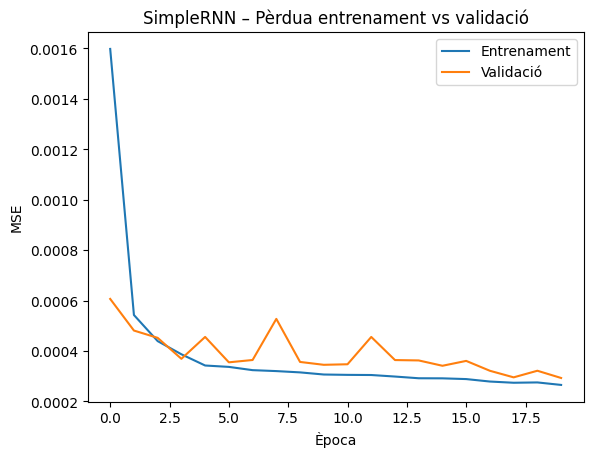

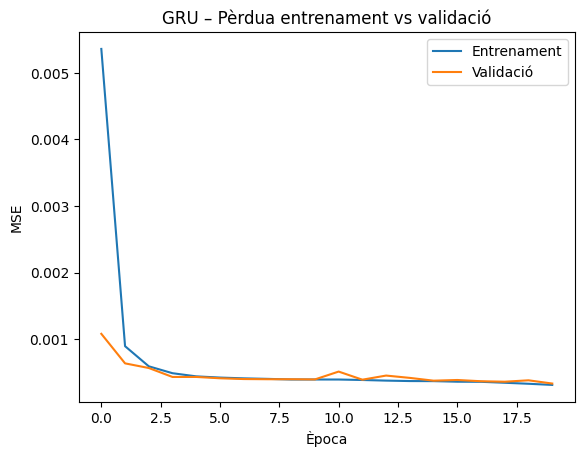

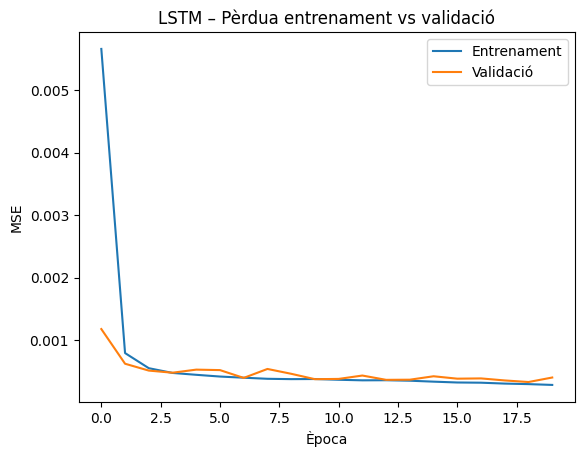

In [23]:
import matplotlib.pyplot as plt

# Completa l'exercici
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

history_gru = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

def plot_history(hist, title):
    plt.figure()
    plt.plot(hist.history['loss'],      label='Entrenament')
    plt.plot(hist.history['val_loss'],  label='Validació')
    plt.xlabel('Època')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_rnn,  'SimpleRNN – Pèrdua entrenament vs validació')
plot_history(history_gru,  'GRU – Pèrdua entrenament vs validació')
plot_history(history_lstm, 'LSTM – Pèrdua entrenament vs validació')

El model SimpleRNN redueix de manera constant la pèrdua d’entrenament però s'observen pics en la pèrdua de validació, això pot voler dir una certa dificultat per aprendre tota la variabilitat de la sèrie.

El model GRU convergeix molt ràpidament amb corbes d’entrenament i validació gairebé superposades, això ens indica una bona estabilitat i capacitat de generalització des de les primeres èpoques.

El model LSTM aconsegueix la caiguda més pronunciada de la MSE en les primeres èpoques i manté les corbes molt planes, demostrant la seva eficiència i robustesa en la regressió de la sèrie temporal.

## 4.5. Fer Prediccions Futures i Comparar Rendiment

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Prediu valors futurs utilitzant el conjunt de prova i compara el rendiment.</p>
</div>




In [24]:
from sklearn.metrics import mean_squared_error

# Completa l'exercici

rnn_preds  = rnn_model.predict(X_test)
gru_preds  = gru_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)

rnn_mse   = mean_squared_error(y_test, rnn_preds)
gru_mse   = mean_squared_error(y_test, gru_preds)
lstm_mse  = mean_squared_error(y_test, lstm_preds)

print(f"MSE RNN Simple: {rnn_mse:.6f}")
print(f"MSE GRU: {gru_mse:.6f}")
print(f"MSE LSTM: {lstm_mse:.6f}")

909/909 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
909/909 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE RNN Simple: 0.000293
MSE GRU: 0.000333
MSE LSTM: 0.000398


## 4.6. Experimentar amb la Mida de Finestra

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong> Canvia el window_size per explorar com depèn la predicció de l'interval de temps. Prova per exemple amb una mida de finestra de 48 hores.</p>
</div>




In [25]:
# Completa l'exercici
window_size = 48  # finestres de 48 hores

X_all, y_all = create_sequences(scaled_values, window_size)

# 80% train 20% test
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape},  y_test:  {y_test.shape}")

X_train: (116254, 48, 1), y_train: (116254, 1)
X_test:  (29064, 48, 1),  y_test:  (29064, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense


# Completa l'exercici

n_features = 1

# RNN
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(window_size, n_features)),
    Dense(1)
])
rnn_model.compile(loss='mean_squared_error', optimizer='adam')

# GRU
gru_model = Sequential([
    GRU(50, input_shape=(window_size, n_features)),
    Dense(1)
])
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# LSTM
lstm_model = Sequential([
    LSTM(50, input_shape=(window_size, n_features)),
    Dense(1)
])
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


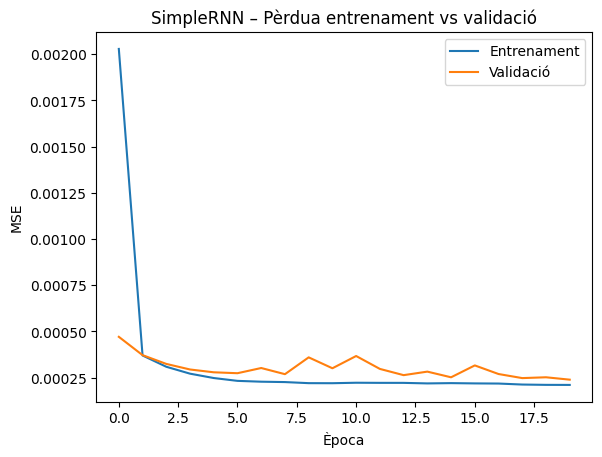

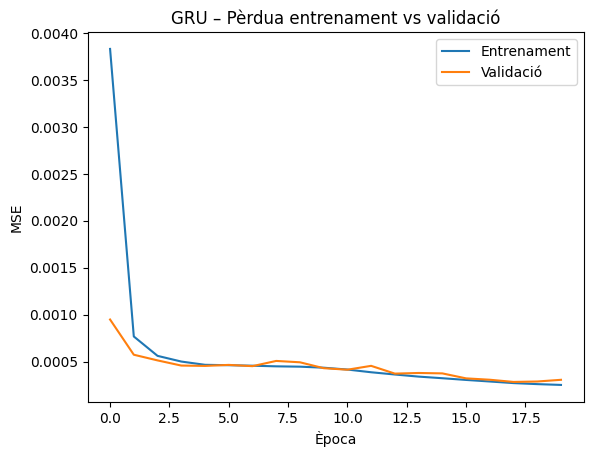

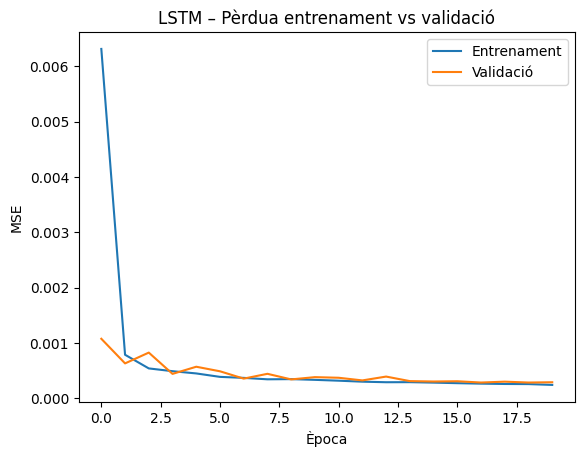

In [27]:
import matplotlib.pyplot as plt

# Completa l'exercici
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

history_gru = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=0
)

def plot_history(hist, title):
    plt.figure()
    plt.plot(hist.history['loss'],      label='Entrenament')
    plt.plot(hist.history['val_loss'],  label='Validació')
    plt.xlabel('Època')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_rnn,  'SimpleRNN – Pèrdua entrenament vs validació')
plot_history(history_gru,  'GRU – Pèrdua entrenament vs validació')
plot_history(history_lstm, 'LSTM – Pèrdua entrenament vs validació')

```python
T = tf.shape(inputs)[0]
        batch_size = tf.shape(inputs)[1]

        # Inicialitza estat si no se n'ha passat cap
        if state is None:
            h = tf.zeros((batch_size, self.num_hiddens), dtype=inputs.dtype)
            c = tf.zeros((batch_size, self.num_hiddens), dtype=inputs.dtype)
        else:
            h, c = state

        outputs = []
        for t in range(T):
            X_t = inputs[t]

            # Porta d'oblit
            f_t = tf.sigmoid(
                tf.matmul(X_t, self.W_xf) +
                tf.matmul(h, self.W_hf) +
                self.b_f
            )
            # Porta d'entrada
            i_t = tf.sigmoid(
                tf.matmul(X_t, self.W_xi) +
                tf.matmul(h, self.W_hi) +
                self.b_i
            )
            # Cel·la candidata
            c_tilde = tf.tanh(
                tf.matmul(X_t, self.W_xc) +
                tf.matmul(h, self.W_hc) +
                self.b_c
            )
            # Actualitza c
            c = f_t * c + i_t * c_tilde

            # Porta de sortida
            o_t = tf.sigmoid(
                tf.matmul(X_t, self.W_xo) +
                tf.matmul(h, self.W_ho) +
                self.b_o
            )
            # Estat ocult
            h = o_t * tf.tanh(c)

            outputs.append(h)

        return outputs, (h, c)        for t in range(T):
            X_t = inputs[t]  # (batch_size, num_inputs)
            state = tf.tanh(tf.matmul(X_t, self.W_xh) + tf.matmul(state, self.W_hh) + self.b_h)
            outputs.append(state)4.7.
```

## Model LSTM Profund amb Optimització d'Hiperparàmetres utilitzant Optuna

Construir un model LSTM més profund (amb més capes) i utilitzar Optuna per optimitzar hiperparàmetres clau. A continuació, comparar el seu rendiment amb els models anteriors (RNN, GRU i LSTM bàsic)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1.75 pts.]:</strong> Definició del Model LSTM Profund. Crearem un model amb:

<ul>
 <li>2 capes LSTM (amb return_sequences=True a la primera per apilar-les).</li>
 <li>Capa Densa final.</li>
 <li>Dropout per a regularització (evitar overfitting).</li>
 </ul>

Després toca definir hiperparàmetres a Optimitzar amb Optuna. Optuna buscarà la millor combinació de:

 <ul>
  <li>Nombre de neurones a cada capa LSTM: Entre 32 i 128.</li>
  <li>Taxa de Dropout: Entre 0.1 i 0.5.</li>
  <li>Taxa d'aprenentatge (learning rate): Entre 1e-4 i 1e-2 (log scale).</li>
  <li>Batch size: 32, 64 o 128.</li>
 </ul>


 Finalment, avalua i compara amb els models anteriors. Per fer-ho et proporcionem el codi per a una millor llegibilitat.

 </p>

</div>





In [28]:
!pip install optuna # Recorda instal·lar en cas de no tenir-lo

In [29]:
# Completa l'exercici
import optuna
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

window_size = 24  # Utilitzant les últimes 24 hores per predir la següent hora
X, y = [], []

for i in range(len(scaled_values) - window_size):
    X.append(scaled_values[i:i + window_size])
    y.append(scaled_values[i + window_size])

X, y = np.array(X), np.array(y)

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model optuna
def build_deep_lstm(trial):
    # Hiperparàmetres a optimitzar
    n_units1 = trial.suggest_int('n_units1', 32, 128)
    n_units2 = trial.suggest_int('n_units2', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    
    model = Sequential([
        LSTM(n_units1, return_sequences=True, input_shape=(window_size, 1)),
        Dropout(dropout_rate),
        LSTM(n_units2),
        Dropout(dropout_rate),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def objective(trial):
    model = build_deep_lstm(trial)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # afegeixo early stopping perquè triga molt
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        callbacks=[early_stopping],        
        batch_size=batch_size,
        verbose=0
    )
    
    return history.history['val_loss'][-1]

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
print("Millors hiperparàmetres:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

[I 2025-04-20 08:43:37,791] A new study created in memory with name: no-name-cb942c1d-182b-4bd7-8090-201d545f0c9e
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-04-20 08:44:19,633] Trial 0 finished with value: 0.00046120735350996256 and parameters: {'n_units1': 62, 'n_units2': 57, 'dropout_rate': 0.49557768967609195, 'lr': 0.005607330612115701, 'batch_size': 128}. Best is trial 0 with value: 0.00046120735350996256.
[I 2025-04-20 08:46:12,072] Trial 1 finished with value: 0.0003134425787720829 and parameters: {'n_units1': 87, 'n_units2': 99, 'dropout_rate': 0.13973895916636625, 'lr': 0.0003142988001307005, 'batch_size': 64}. Best is trial 1 with value: 0.0003134425787720829.
[I 2025-04-20 08:47:18,831] Trial 2 finished with value: 0.00061512179

Millors hiperparàmetres:
  n_units1: 79
  n_units2: 62
  dropout_rate: 0.2389212464845193
  lr: 0.005190432488527139
  batch_size: 64


In [34]:
# contruir model lstm
model_deep_lstm = build_deep_lstm(study.best_trial)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# entrenar
model_deep_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0054 - val_loss: 3.6250e-04
Epoch 2/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 5.9408e-04 - val_loss: 4.1682e-04
Epoch 3/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 5.4085e-04 - val_loss: 3.0994e-04
Epoch 4/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 4.9917e-04 - val_loss: 3.3407e-04
Epoch 5/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 4.4348e-04 - val_loss: 2.7985e-04
Epoch 6/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 4.1709e-04 - val_loss: 2.4940e-04
Epoch 7/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 4.0701e-04 - val_loss: 2.3729e-04
Epoch 8/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 3.7894e-04 - val_loss: 2.3214e-04
Epoch 9/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 3.6368e-04 - val_loss: 2.3394e-04
Epoch 10/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 3.5800e-04 - val_loss: 2.1926e-04
Epoch 11/50
1817/1817 ━━━━━━━━━━━

909/909 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE (Deep LSTM + Optuna): 0.000208
Comparació de MSE:
909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
- RNN: 0.020038
909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
- GRU: 0.001508
909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
- LSTM bàsic: 0.001114
- LSTM profund + Optuna: 0.000208
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


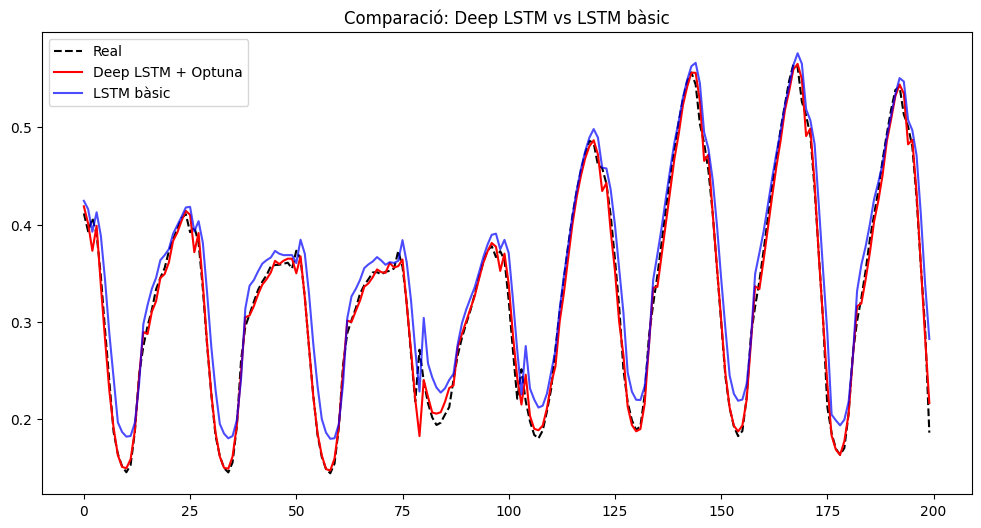

In [37]:
# Avaluar el model profund
deep_lstm_mse = mean_squared_error(y_test, model_deep_lstm.predict(X_test))
print(f"MSE (Deep LSTM + Optuna): {deep_lstm_mse:.6f}")

# Comparar amb models anteriors (exercici 5)
print("Comparació de MSE:")
print(f"- RNN: {mean_squared_error(y_test, rnn_model.predict(X_test)):.6f}")
print(f"- GRU: {mean_squared_error(y_test, gru_model.predict(X_test)):.6f}")
print(f"- LSTM bàsic: {mean_squared_error(y_test, lstm_model.predict(X_test)):.6f}")
print(f"- LSTM profund + Optuna: {deep_lstm_mse:.6f}")

# Gràfica comparativa de prediccions (primeres 200 mostres)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='Real', color='black', linestyle='--')
plt.plot(model_deep_lstm.predict(X_test[:200]), label='Deep LSTM + Optuna', color='red')
plt.plot(lstm_model.predict(X_test[:200]), label='LSTM bàsic', color='blue', alpha=0.7)
plt.legend()
plt.title("Comparació: Deep LSTM vs LSTM bàsic")
plt.show()